In [1]:
# Módulos necessários
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Constantes
R = 1
L = 1
C = 1
t = np.linspace(0, 20, 50)
delta = t[1] - t[0]

# Condições iniciais
q0 = 1
I0 = 0

# EDOs
def dq(t, q, I):
    return I
def dI(t, q, I):
    return - (R*I + q/C) / L

In [3]:
# Solução analítica
q_analytical = 2 / 3**0.5 * np.e**(-t / 2) * np.cos(3**.5 / 2 * t - np.pi / 6)

In [4]:
# Método de Euler
q_euler = np.zeros(len(t))
I = np.zeros(len(t))

q_euler[0] = q0
I[0] = I0

for i in range(1, len(t)):
    q_euler[i] = q_euler[i-1] + delta * dq(t[i-1], q_euler[i-1], I[i-1])
    I[i] = I[i-1] + delta * dI(t[i-1], q_euler[i-1], I[i-1])

In [5]:
# Método de Euler Modificado
q_emod = np.zeros(len(t))
I = np.zeros(len(t))

q_emod[0] = q0
I[0] = I0

for i in range(1, len(t)):
    k1 = delta * dq(t[i-1], q_emod[i-1], I[i-1])
    l1 = delta * dI(t[i-1], q_emod[i-1], I[i-1])
    
    k2 = delta * dq(t[i-1] + delta, q_emod[i-1] + k1, I[i-1] + l1)
    l2 = delta * dI(t[i-1] + delta, q_emod[i-1] + k1, I[i-1] + l1)

    q_emod[i] = q_emod[i-1] + (k1 + k2) / 2
    I[i] = I[i-1] + (l1 + l2) / 2

In [6]:
# Método do Ponto Médio
q_midpoint = np.zeros(len(t))
I = np.zeros(len(t))

q_midpoint[0] = q0
I[0] = I0

for i in range(1, len(t)):
    k1 = delta * dq(t[i-1], q_midpoint[i-1], I[i-1])
    l1 = delta * dI(t[i-1], q_midpoint[i-1], I[i-1])
    
    k2 = delta * dq(t[i-1] + delta/2, q_midpoint[i-1] + k1/2, I[i-1] + l1/2)
    l2 = delta * dI(t[i-1] + delta/2, q_midpoint[i-1] + k1/2, I[i-1] + l1/2)

    q_midpoint[i] = q_midpoint[i-1] + k2
    I[i] = I[i-1] + l2

In [7]:
# Método simples de Runge-Kutta de quarta ordem
q_rk4 = np.zeros(len(t))
I = np.zeros(len(t))

q_rk4[0] = q0
I[0] = I0

for i in range(1, len(t)):
    k1 = delta * dq(t[i-1], q_rk4[i-1], I[i-1])
    l1 = delta * dI(t[i-1], q_rk4[i-1], I[i-1])
    
    k2 = delta * dq(t[i-1] + delta/2, q_rk4[i-1] + k1/2, I[i-1] + l1/2)
    l2 = delta * dI(t[i-1] + delta/2, q_rk4[i-1] + k1/2, I[i-1] + l1/2)
    
    k3 = delta * dq(t[i-1] + delta/2, q_rk4[i-1] + k2/2, I[i-1] + l2/2)
    l3 = delta * dI(t[i-1] + delta/2, q_rk4[i-1] + k2/2, I[i-1] + l2/2)
    
    k4 = delta * dq(t[i-1] + delta, q_rk4[i-1] + k3, I[i-1] + l3)
    l4 = delta * dI(t[i-1] + delta, q_rk4[i-1] + k3, I[i-1] + l3)

    q_rk4[i] = q_rk4[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    I[i] = I[i-1] + (l1 + 2*l2 + 2*l3 + l4) / 6

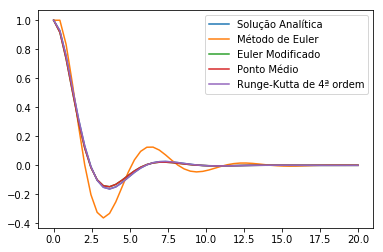

In [8]:
# Resultados
plt.plot(t, q_analytical)
plt.plot(t, q_euler)
plt.plot(t, q_emod)
plt.plot(t, q_midpoint)
plt.plot(t, q_rk4)

plt.legend(['Solução Analítica', 'Método de Euler', 'Euler Modificado', 'Ponto Médio', 'Runge-Kutta de 4ª ordem'])